# Chap01 - Introduction

## 1.2 베이지안 프레임워크

$$
P\left( { A }|{ X } \right) =\frac { P\left( { X }|{ A } \right) P\left( A \right)  }{ P\left( X \right)  } \propto P\left( { X }|{ A } \right) P\left( A \right) 
$$

### 1.2.1 예제: 피해갈 수 없는 동전 던지기

In [2]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html 참고

%matplotlib inline
import matplotlib
import numpy as np
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

# linux -> apt-get install fonts-nanum*
matplotlib.rc('font', family='NanumGothic')  
# matplotlib.rc('font', family='AppleGothic')  # Mac
figsize(11, 9)

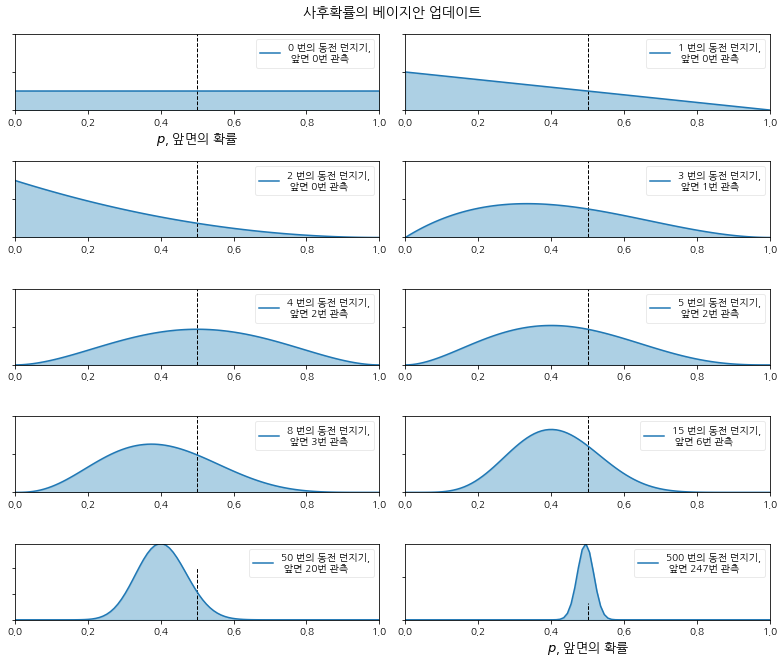

In [3]:
dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k+1)
    if k in [0, len(n_trials) - 1]:
        plt.xlabel('$p$, 앞면의 확률', fontsize = 13)
    else:
        None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label='{} 번의 동전 던지기,\n 앞면 {}번 관측'.format(N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color='k', linestyles="--", lw=1)
    
    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("사후확률의 베이지안 업데이트", y=1.02, fontsize=14)

plt.tight_layout()

### 1.2.2 예제: 사서일까, 농부일까?

In [4]:
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

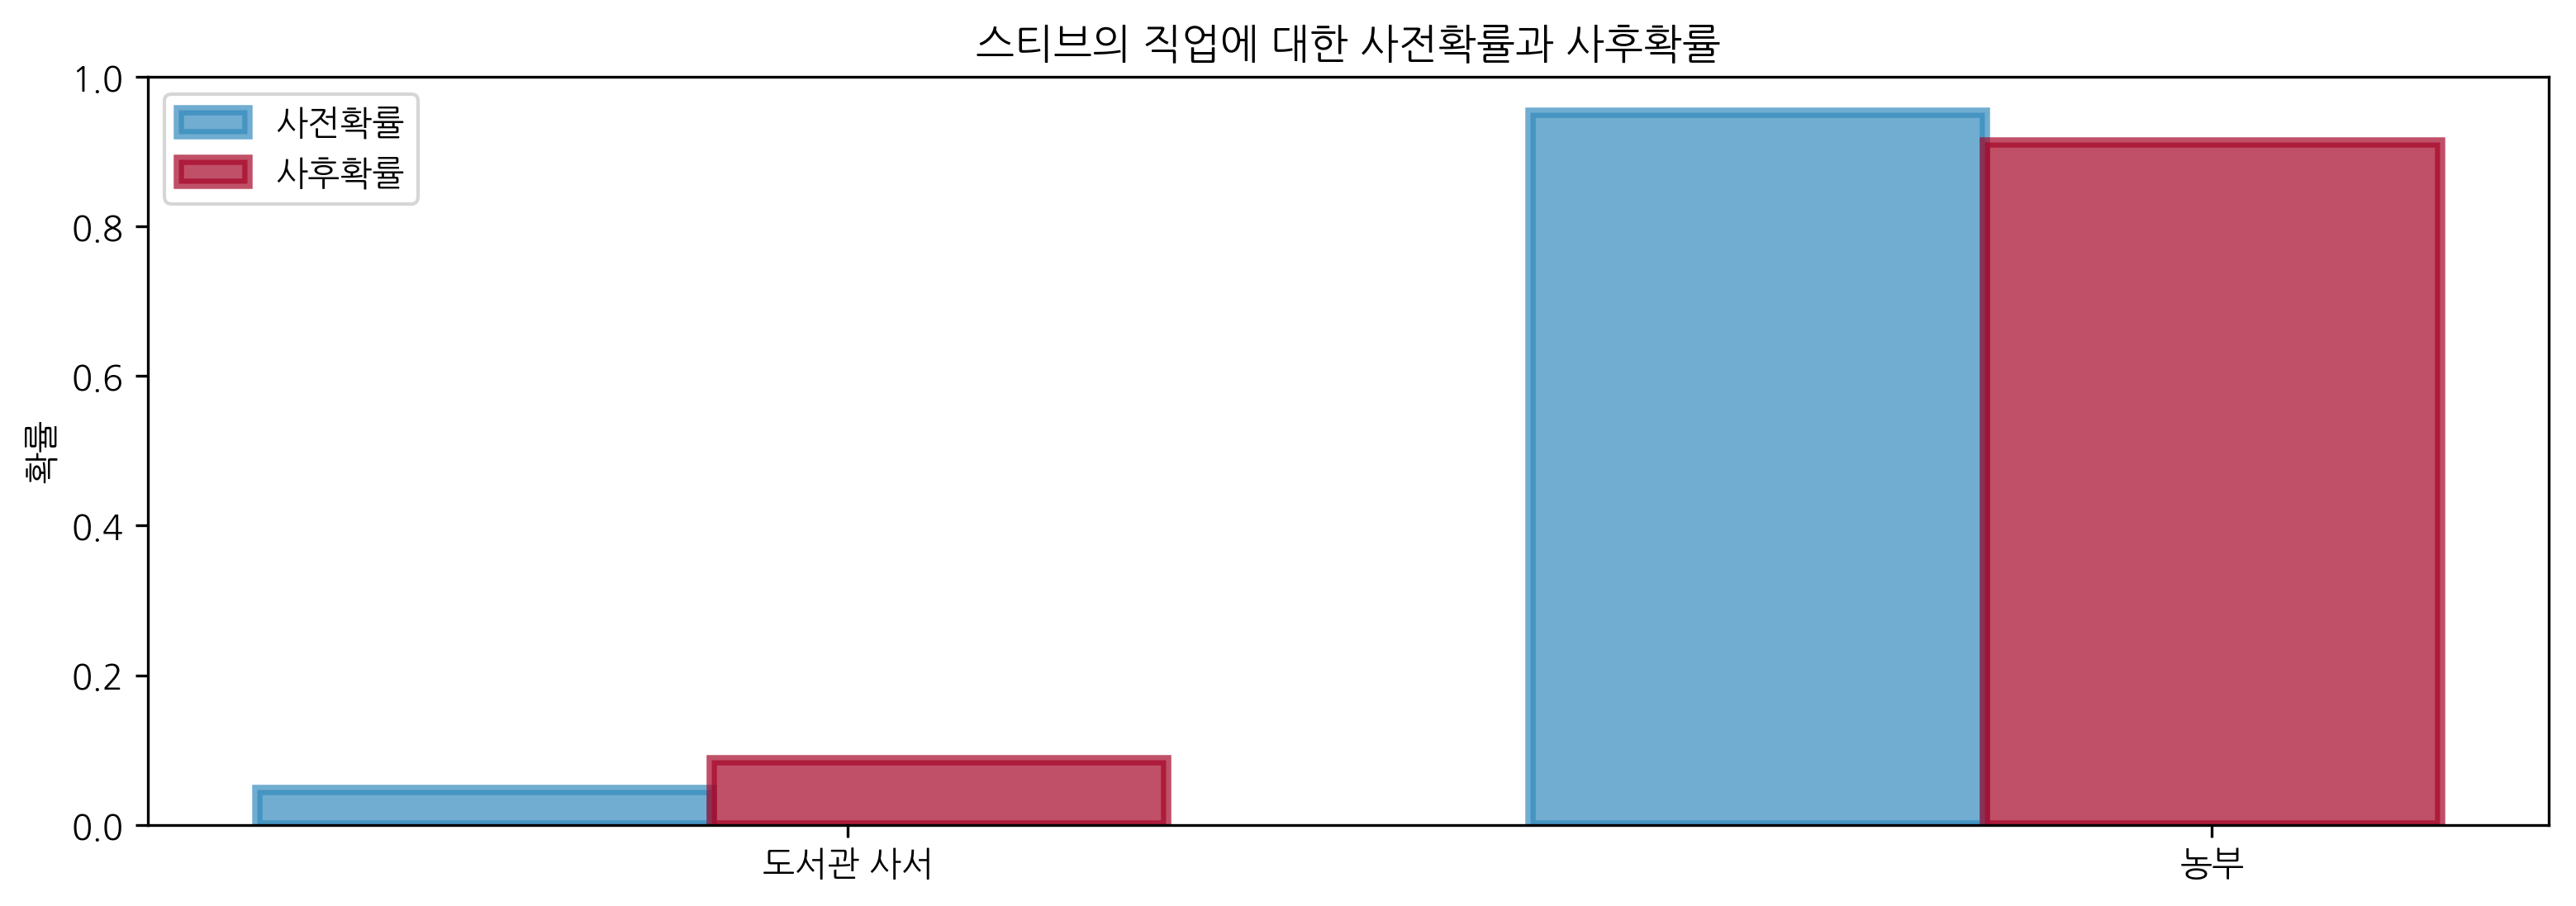

In [5]:
colors = ['#348ABD', "#A60628"]
prior = [1/21., 20/21.]  # 사전확률 : [P(A), P(~A)] 
posterior = [0.087, 1-0.087]  # 사후확률 : [P(A|X), P(~A|X)]
plt.bar([0, .7], prior, alpha=0.7, width=0.25,
        color=colors[0], label="사전확률", 
        lw="3", edgecolor='#348ABD')

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7, 
        width=0.25, color=colors[1], label='사후확률', 
        lw="3", edgecolor='#A60628')

plt.xticks([0.20, 0.95], ['도서관 사서', '농부'])
plt.title('스티브의 직업에 대한 사전확률과 사후확률')
plt.ylabel('확률')
plt.legend(loc='upper left')

## 1.3 확률분포

### 1.3.1 이산적인 경우

$Z$를 화률변수(random variable)라고 하고, 이산적이라면 그 분포를 ***확률질량함수 (probability mass function)*** 라고 한다.

확률질량함수는 $Z$가 특정값 $k$를 가질 때의 확률, $P(Z=k)$ 를 나타낸다.

<img src="./images/pmf.png" width="50%" height="50%" />

#### 푸아송분포 Poisson-ditribution

$$
P(Z=k) = \frac{\lambda^k e^{- \lambda}}{k!}, \quad k=0,1,2,...
$$

- $\lambda$는 분포의 모수이며 분포 모양을 결정한다. 푸아송분포에서 $\lambda$는 양수다. 
- $\lambda$를 늘리면 큰 값에 더 많은 확률을 부여하고, 줄이면 작은 값에 더 많은 확률을 부여한다. 
    - $\lambda$는 푸아송 분포의 ***밀도(intensity)*** 를 나타낸다.

- $k$ 는 음수가 아닌 정수($0, 1, 2, \cdots$)여야 한다. $\rightarrow$ *인구 모델일 경우 4.25명인 경우는 없다!*

확률변수 $Z$가 푸아송분포를 따른다면 다음과 같이 나타낼 수 있다.

$$
Z \sim Poi (\lambda)
$$

푸아송분포의 유용한 속성 한 가지는 그 기대값이 모수와 같다는 것이다.

$$
E[Z|\lambda] = \lambda
$$

아래의 예제는 [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy-stats-poisson) 을 이용해 푸아송분포를 구현한 코드이다.

Text(0.5,1,'$\\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수($pmf$)')

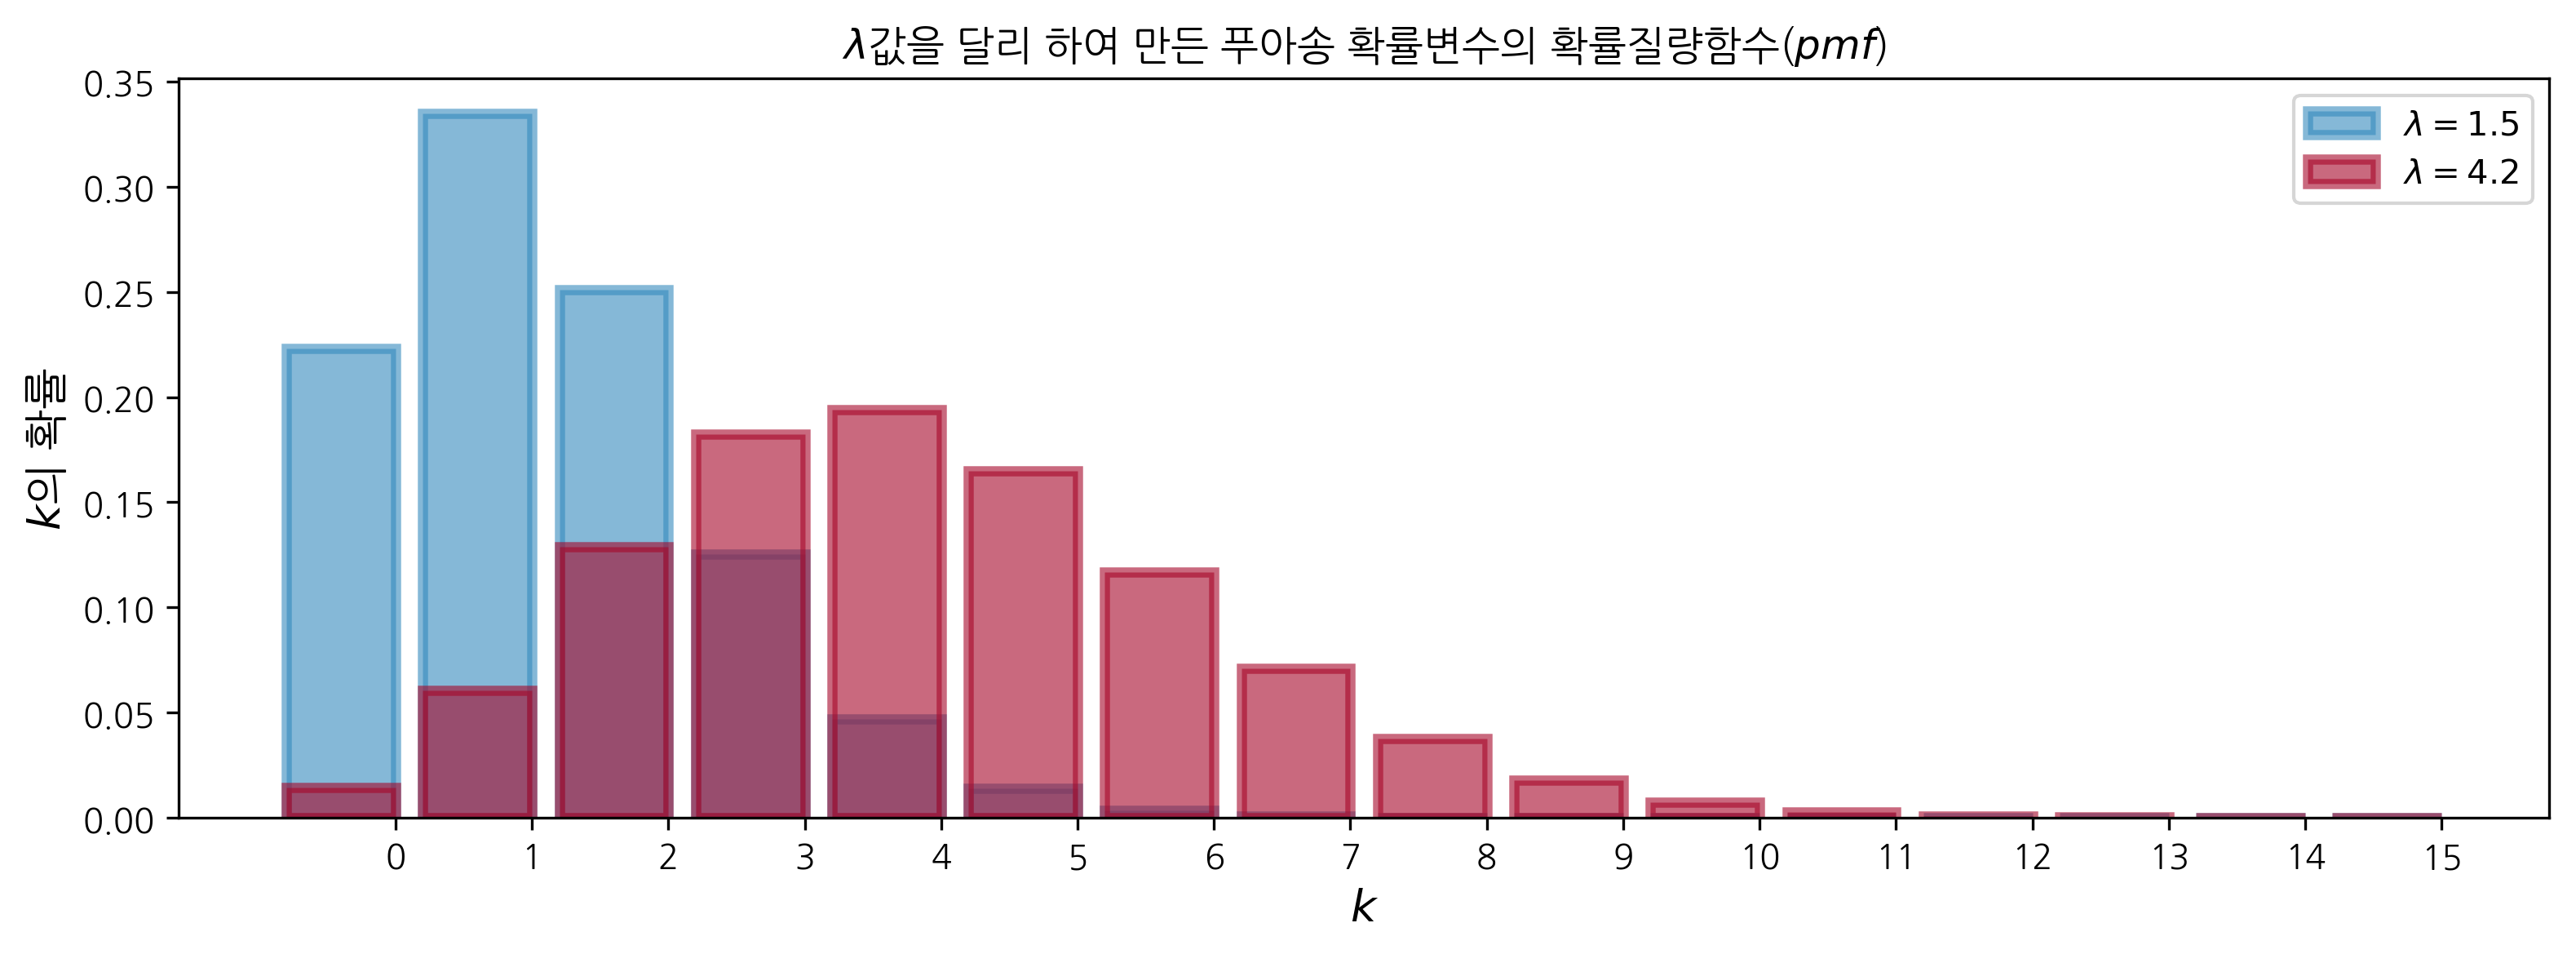

In [6]:
figsize(12.5, 4)

a = np.arange(16)  # array([ 0, ..., 15])
poi = stats.poisson
lambdas = [1.5, 4.25]  # 푸아송분포의 lambda
colors = ['#348ABD', '#A60628']

for lambda_, color in zip(lambdas, colors):
    plt.bar(a, poi.pmf(a, lambda_), color=color, 
        label='$\lambda={:.1f}$'.format(lambda_), 
        alpha=0.60, edgecolor=color, lw='3')
    
plt.xticks(a+0.4, a)
plt.legend()
plt.ylabel('$k$의 확률', fontsize=13)
plt.xlabel('$k$', fontsize=13)
plt.title('$\lambda$값을 달리 하여 만든 푸아송 확률변수의 확률질량함수($pmf$)')

### 1.3.2 연속적인 경우

연속확률변수는 ***확률밀도함수(PDF, Probability Density Function)***를 가진다.

![](./images/pdf.png)

$$
f(x) \ge 0
$$
$$
P\left( a \le x \le b \right) =\int _{ a }^{ b }{ f(x)dx } 
$$

연속확률변수의 예는 지수밀도를 가진 확률변수가 있다. 

$$
f_{z} \left( { z }|{ \lambda } \right)  = \lambda e^{- \lambda z} , \quad z \ge 0
$$

확률변수 $Z$가 모수가 $\lambda$인 지수분포를 따른다면, $Z$는 ***지수적*** 이라고 하며, 다음과 같이 나타낸다.

$$
Z \sim Exp(\lambda)
$$

특정 $\lambda$가 주어졌을 때 지수확률 변수의 기대값은 $\lambda$의 역수다.

$$
E[Z|\lambda] = \frac{1}{\lambda}
$$

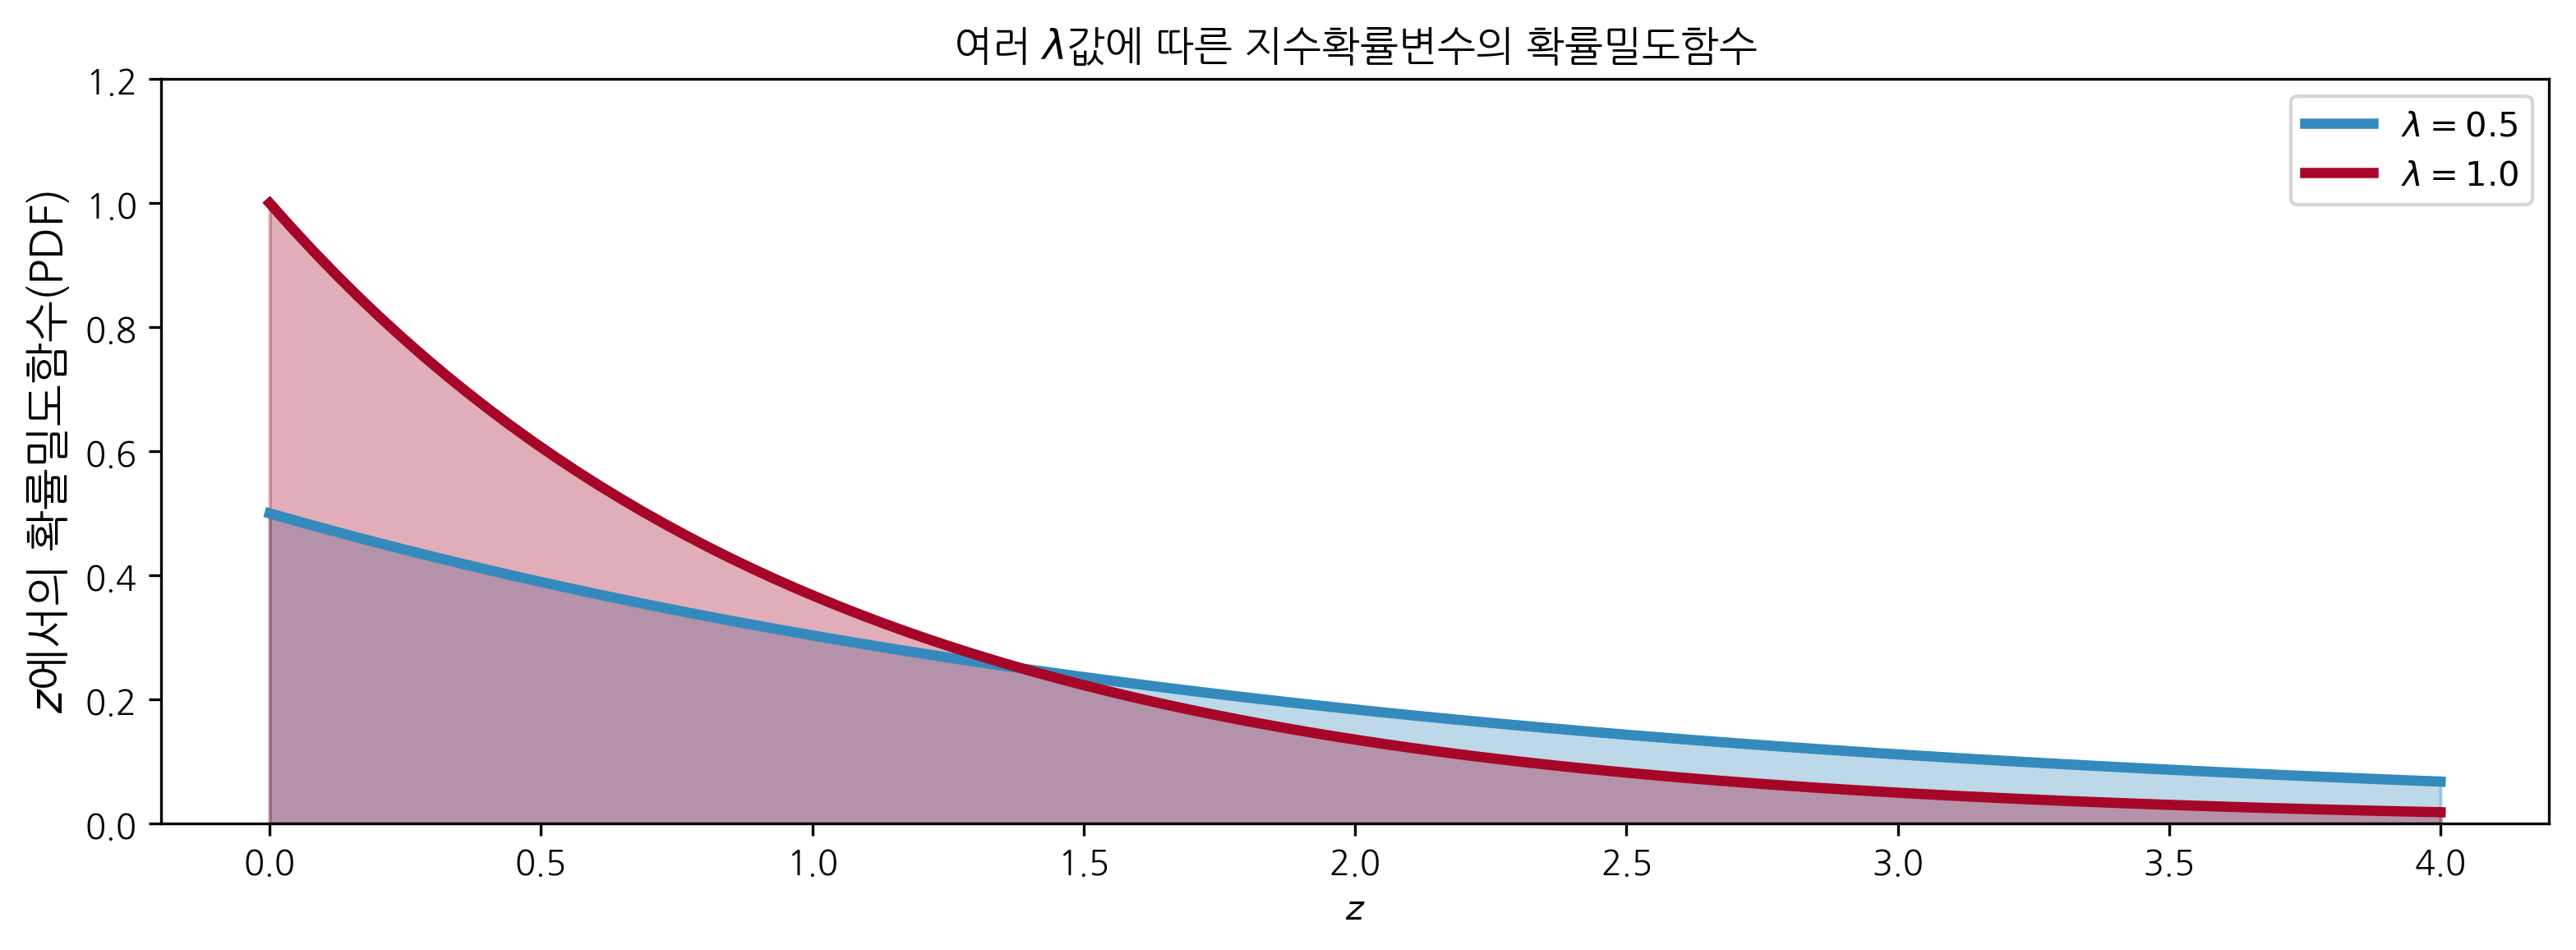

In [7]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]
colors = ['#348ABD', '#A60628']

for l, c in zip(lambda_, colors):
    plt.plot(a, expo.pdf(a, scale=1. / l), lw=3, color=c, 
             label='$\lambda = %.1f$' % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)
    
    plt.legend()
    plt.ylabel('$z$에서의 확률밀도함수(PDF)', fontsize=13)
    plt.xlabel('$z$')
    plt.ylim(0, 1.2)
    plt.title('여러 $\lambda$값에 따른 지수확률변수의 확률밀도함수')

### 1.3.3 그럼 $\lambda$란 무엇인가?


## 1.4 컴퓨터를 사용하여 베이지안 추론하기

### 1.4.1 예제: 문자 메시지 데이터에서 행동 추론하기

- `txtdat.csv`는 어느 사용자가 매일 주고 받은 메시지 개수를 시간별로 표시해 놓은 데이터
- 사용자의 메시지 습관이 시간별로 서서히 변하는지 or 갑자기 급변하는지 알고 싶음
- 어떻게 모델링 할 수 있을까?

(0, 74)

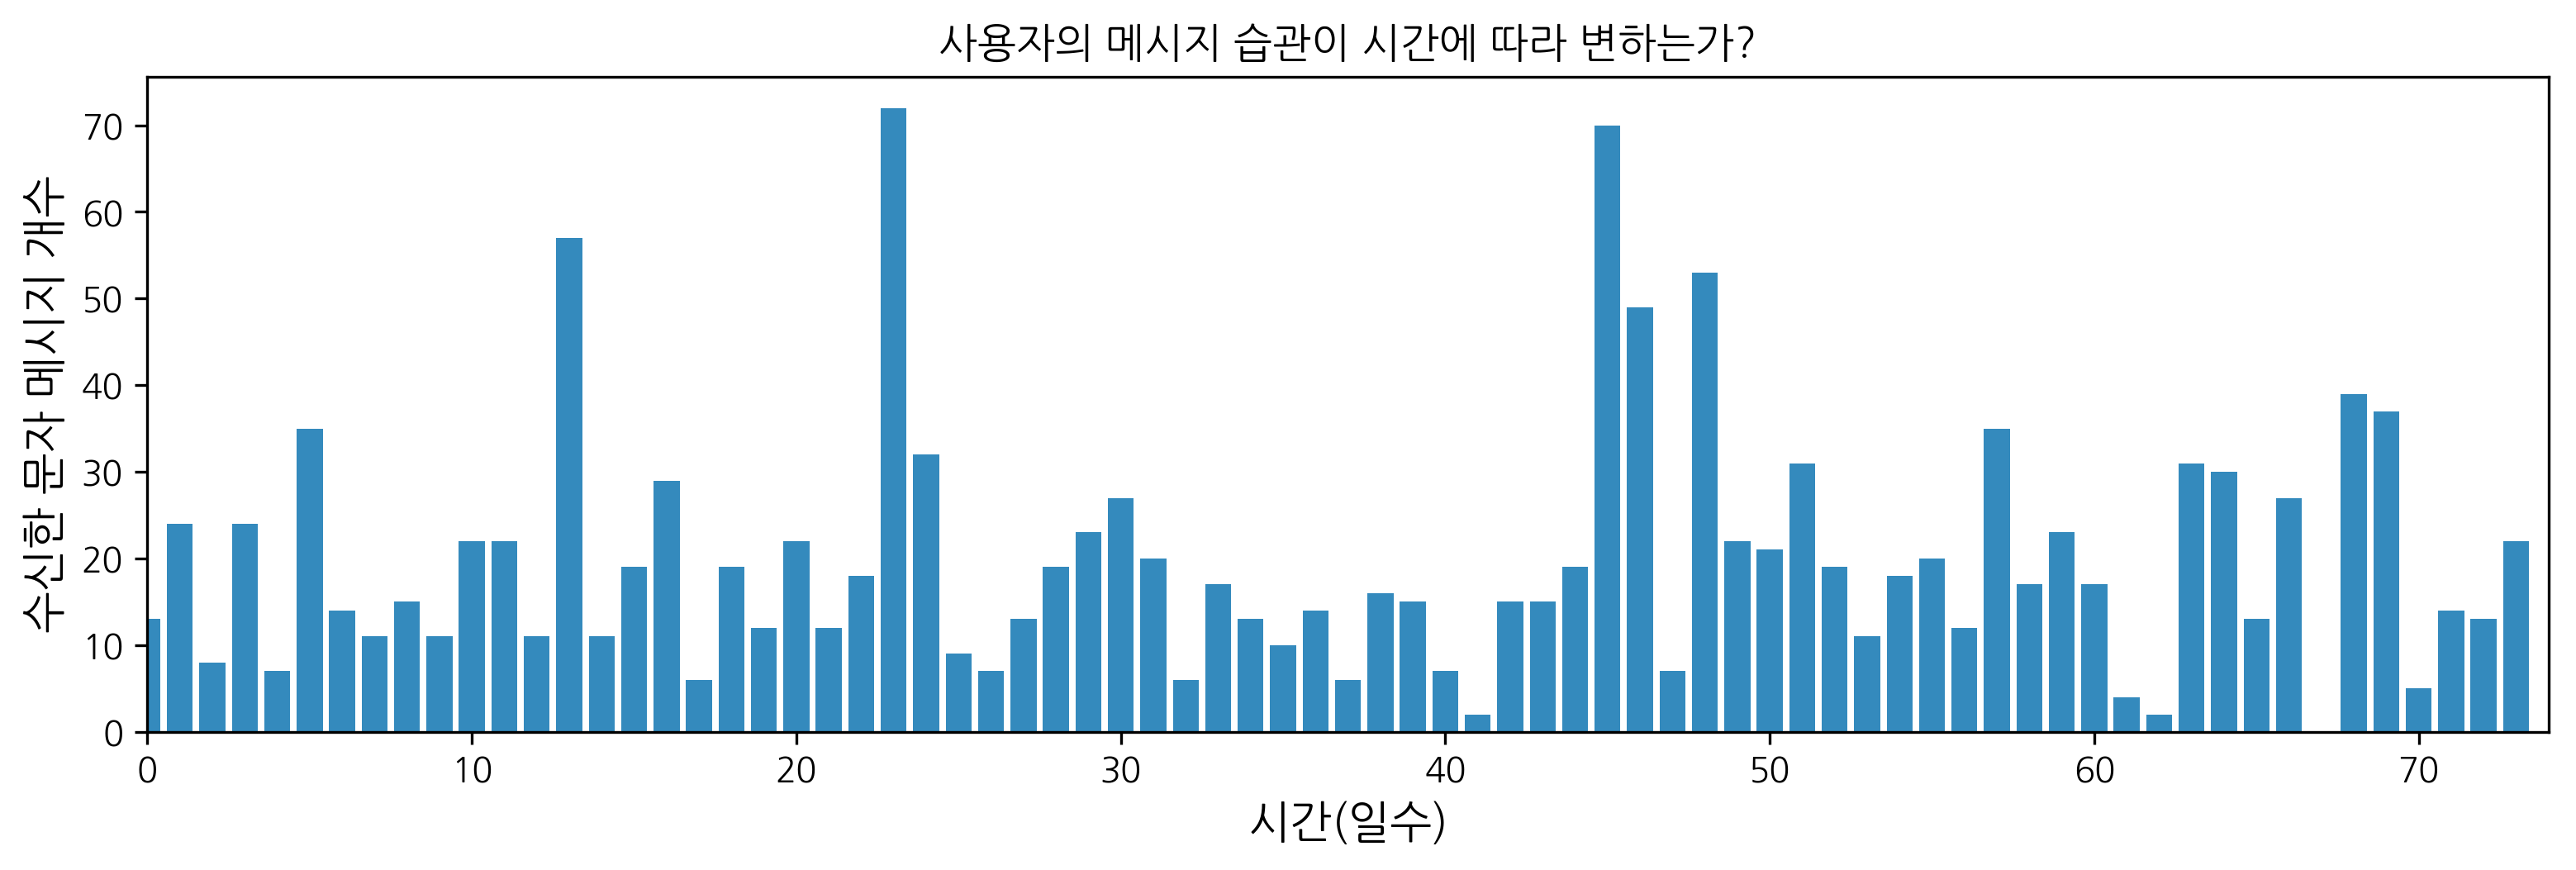

In [8]:
figsize(12.5, 3.5)
count_data = np.loadtxt('./data/txtdata.csv')
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color='#348ABD')
plt.xlabel('시간(일수)', fontsize=13)
plt.ylabel('수신한 문자 메시지 개수', fontsize=13)
plt.title('사용자의 메시지 습관이 시간에 따라 변하는가?')
plt.xlim(0, n_count_data)

모델링을 어떻게 시작하면 좋을까?

1.3.1에서 살펴본 푸아송 확률변수는 위의 데이터와 같이 ***개수*** 데이터에 적합한 모델이다. 특정 일자 $i$의 메시지 개수는 $C_i$로 나타내자.

$$
C_i \sim Poi(\lambda)
$$



### 1.4.2 PyMC

In [11]:
import pymc as pm


alpha = 1.0/count_data.mean()  # count_data 변수는 문자 메시지 개수를 저장
lambda_1 = pm.Exponential('lambda_1', alpha)
lambda_2 = pm.Exponential('lambda_2', alpha)

tau = pm.DiscreteUniform('tau', lower=0, upper=n_count_data)
print('Random output:', tau.random(), tau.random(), tau.random())

@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda_1은 tau 이전 lambda
    out[tau:] = lambda_2  # lambda_2는 tau 이후 lambda
    return out

Random output: 15 43 29


In [12]:
observation = pm.Poisson('obs', lambda_, value=count_data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [18]:
# 3장에서 코드 설명 예정
# 30,000 (= 40,000 - 10,000)개의 표본을 돌려 받음
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

/home/cjh/anaconda3/envs/study/lib/python3.6/site-packages/pymc/MCMC.py:81: UserWarning: Instantiating a Model object directly is deprecated. We recommend passing variables directly to the Model subclass.
  warnings.warn(message)


 [-----------------100%-----------------] 40000 of 40000 complete in 8.7 sec

Text(0,0.5,'확률')

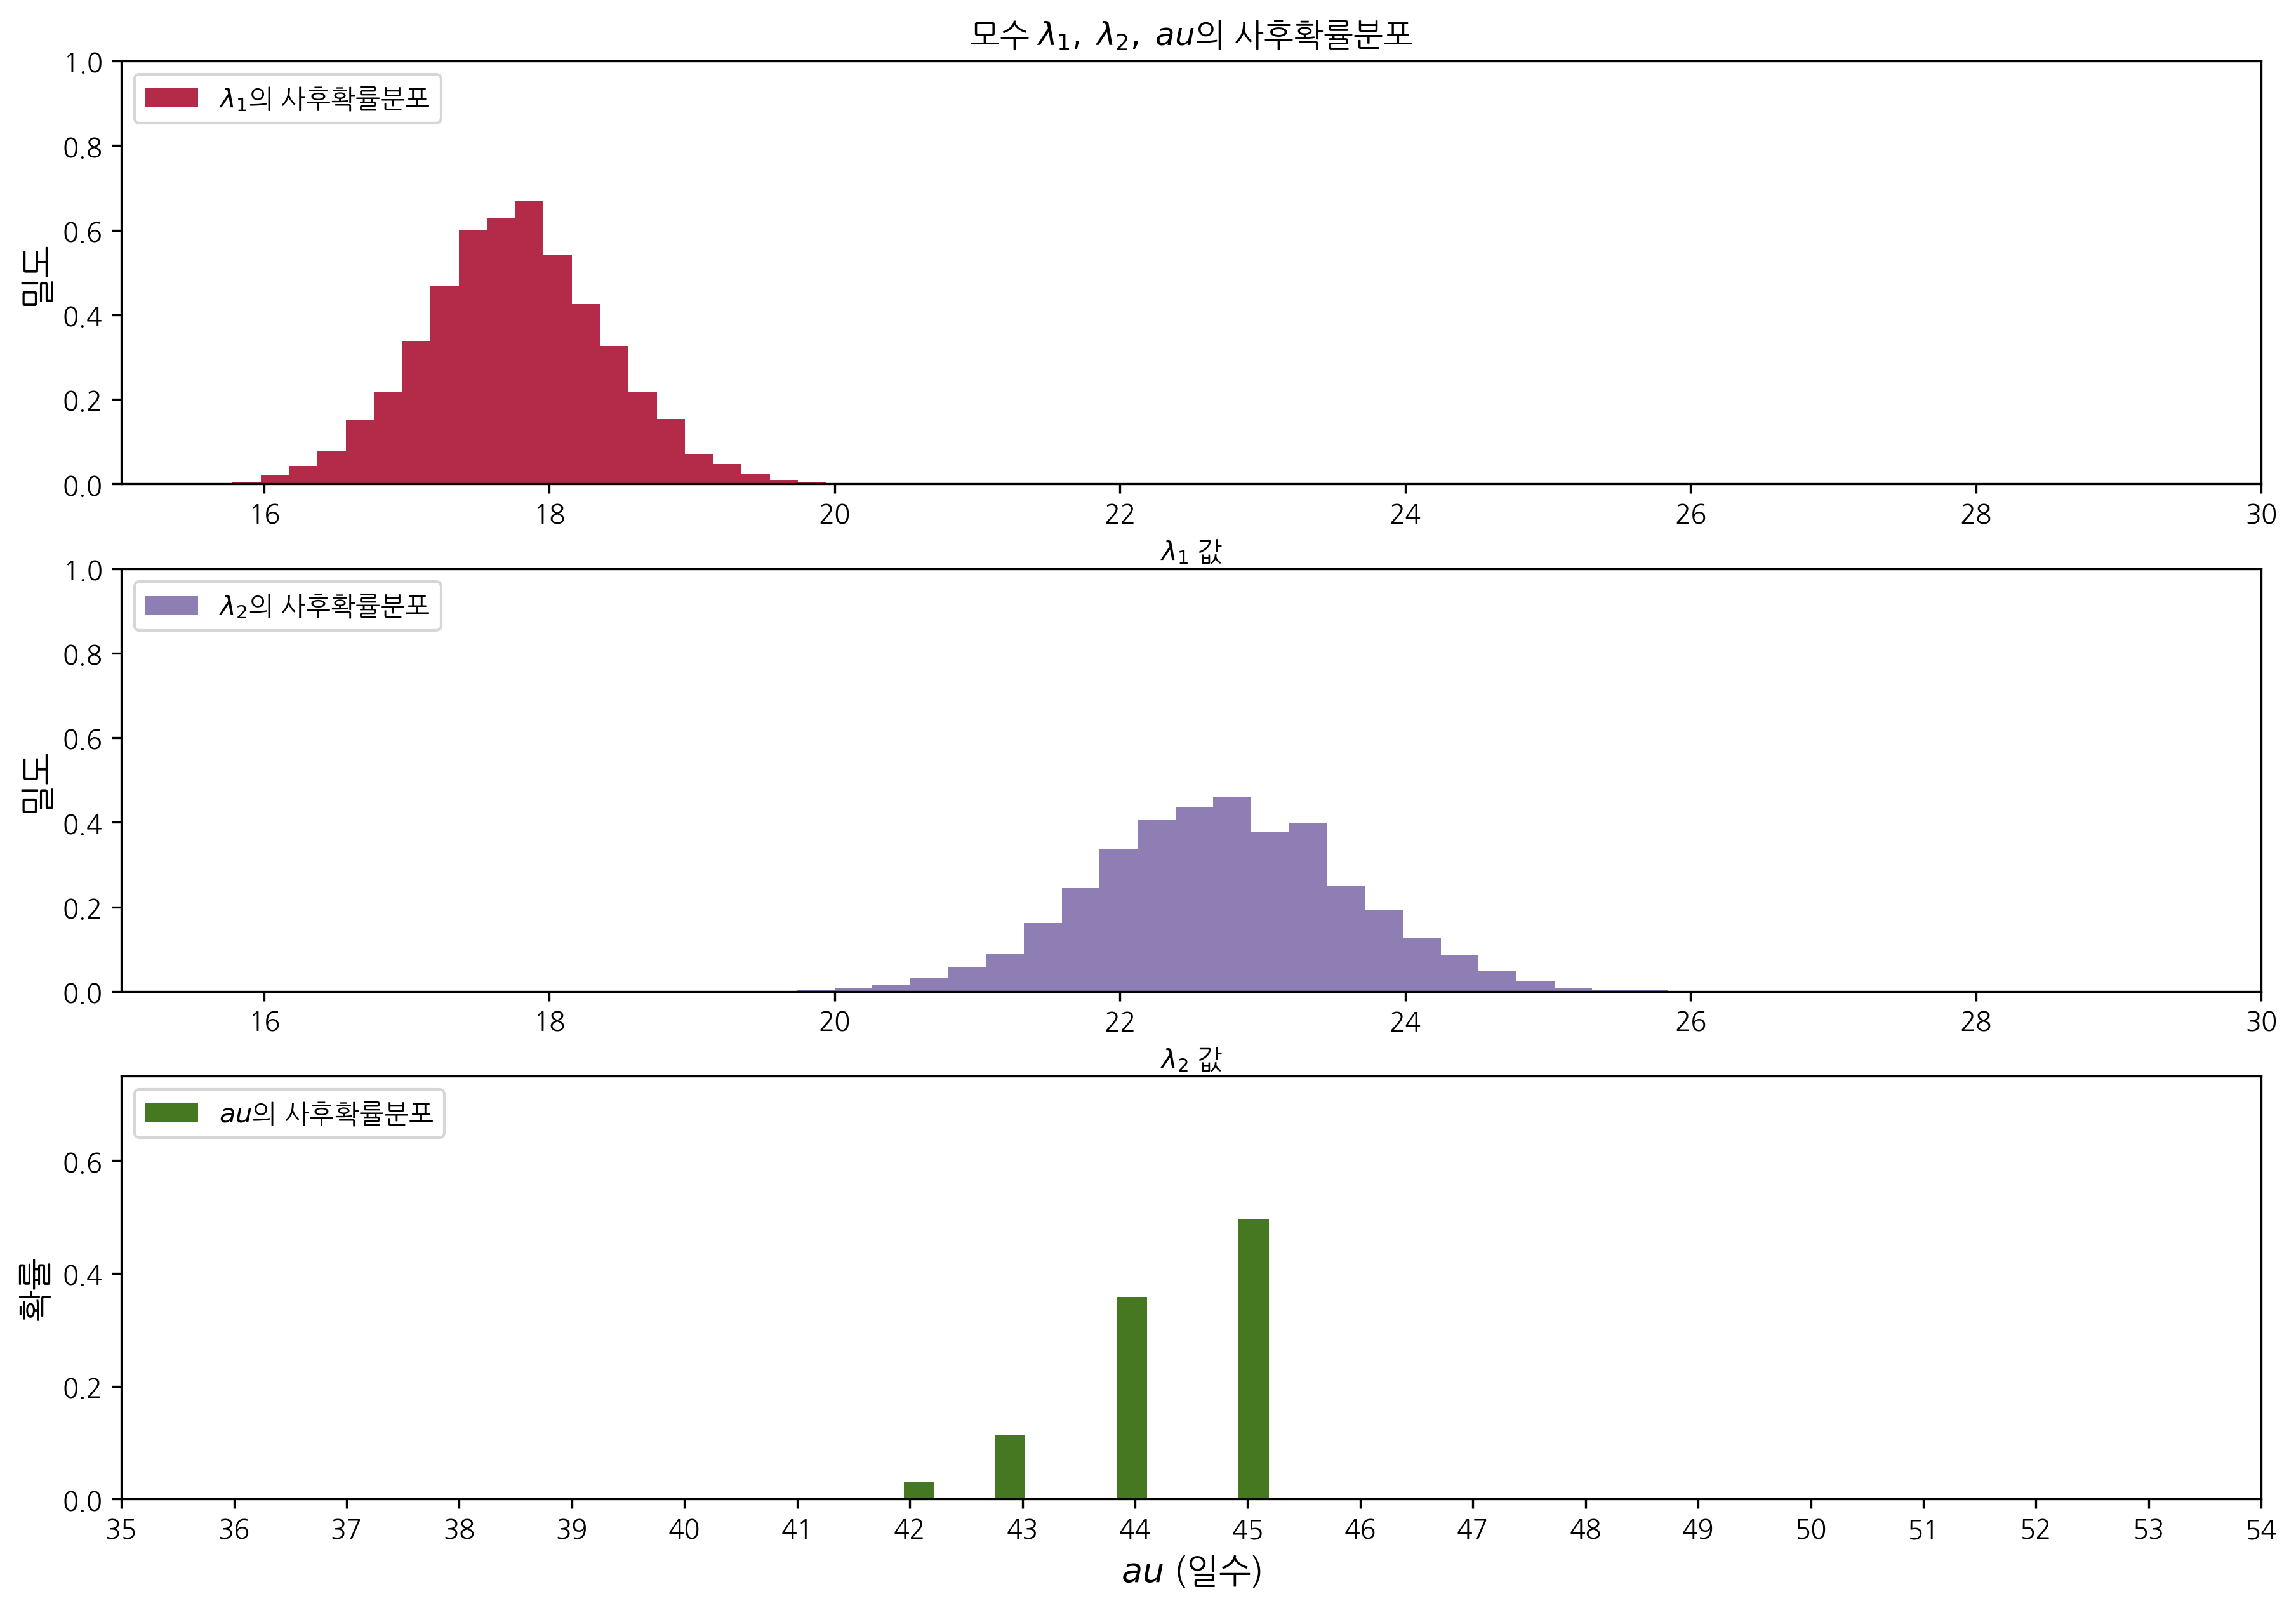

In [28]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

figsize(14.5, 10)

# 표본의 히스토그램
ax = plt.subplot(311)
ax.set_autoscaley_on(False)
plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85, 
         label='$\lambda_1$의 사후확률분포', color='#A60628', density=True)
plt.legend(loc="upper left")
plt.title('모수 $\lambda_1,\;\lambda_2,\;\tau$의 사후확률분포')
plt.xlim([15, 30])
plt.xlabel('$\lambda_1$ 값')
plt.ylabel('밀도', fontsize=13)

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85, 
         label='$\lambda_2$의 사후확률분포', color='#7A68A6', density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel('$\lambda_2$ 값')
plt.ylabel('밀도', fontsize=13)

plt.subplot(313)
w = 1.0 / tau_samples.shape[0]*np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1, label='$\tau$의 사후확률분포',
         color='#467821', weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))
plt.legend(loc='upper left')
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel('$\tau$ (일수)', fontsize=13)
plt.ylabel('확률', fontsize=13)

### 1.4.3

### 1.4.4 사후확률분포에서 얻은 표본에는 어떤 좋은 점이 있는가?

[ 17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75849827  17.75849827  17.75849827  17.75849827
  17.75849827  17.75862288  17.75862288  17.75868004  17.75868004
  17.7594833   17.7626302   17.89731948  18.4301402   20.20874273
  22.71978347  22.72002188  22.72002553  22.72002885  22.72002995
  22.7199825   22.71990654  22.71982624  22.71982624  22.71982624
  22.71982624  22.71974646  22.71974646  22.71974646  22.71974646
  22.71974646  22.71974646  22.71974646  22.71974646  22.71974646
  22.71974646  22.71974646  22.71974646  22.71974646  22.71974646
  22.71974646  22.71974646  22.71974646  22.71974646]


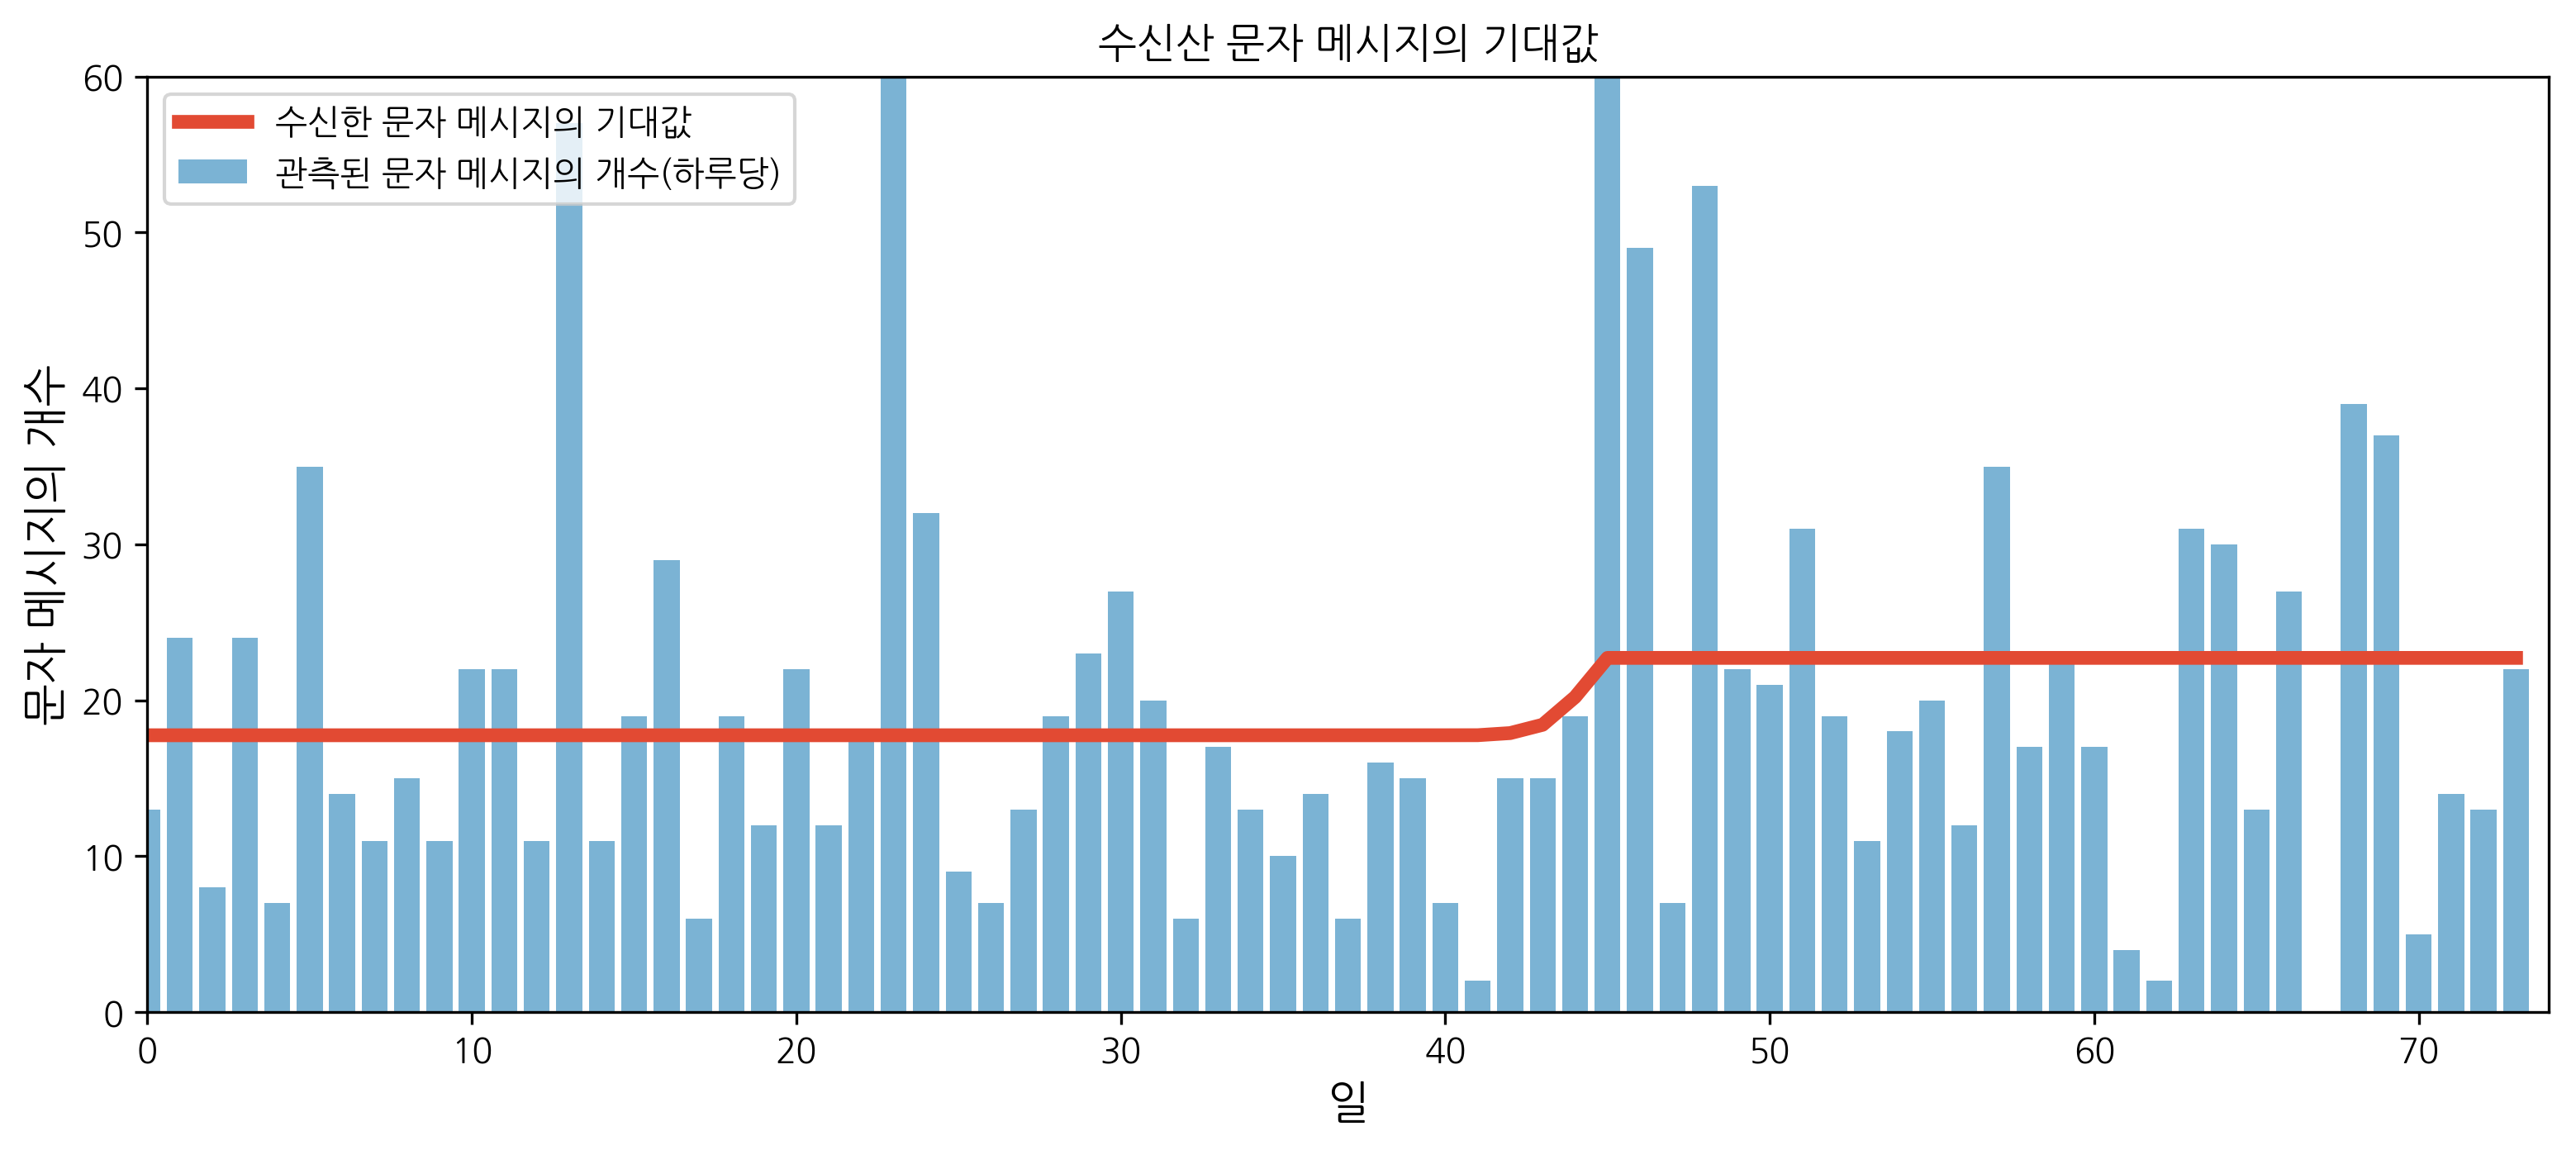

In [36]:
figsize(12.5, 5)

# tau_samples, lambda_1_samples, lambda_2_samples은
# 해당 사후확률분포에서 얻은 표본 N개가 포함된다.
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)  # 데이터 포인트 수

for day in range(0, n_count_data):
    # ix는 'day' 값 이전에 발생한 변환점에 해당하는
    # 모든 tau 표본의 불(boolean) 인덱스다.
    ix = day < tau_samples
    
    # 각 사후확률분포의 표본은 tau 값에 해당한다. tau값은 변환점 이전인지 (lambda_1)
    # 이후인지(lambda_2)를 가리킨다.
    # lambda_1/2의 사후확률분포 표본을 취함으로써 모든 표본을 평균하여 그날의
    # lambda 기대값을 얻을 수 있다.
    # 문자 메시지 개수 확률변수는 푸아송분포를 따르므로
    # lambda(푸아송 모수)는 메시지 개수의 기대값이다.
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / N
    
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, 
         color='#E24A33', label='수신한 문자 메시지의 기대값')
plt.xlim(0, n_count_data)
plt.xlabel('일', fontsize=13)
plt.ylabel('문자 메시지의 개수', fontsize=13)
plt.title('수신산 문자 메시지의 기대값')
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color='#348ABD',
        alpha=0.65, label='관측된 문자 메시지의 개수(하루당)')
plt.legend(loc='upper left')
print(expected_texts_per_day)

## 1.6 부록

### 1.6.1 두 $\lambda$가 정말 다른지 통계적으로 알 수 있나?

In [40]:
print(lambda_1_samples < lambda_2_samples)

[ True  True  True ...,  True  True  True]


In [44]:
# 얼마나 자주 발생하는가?
print((lambda_1_samples < lambda_2_samples).sum())

# 표본이 얼마나 있는가?
print(len(lambda_1_samples))

29995
30000


In [45]:
# 비율은 확률이다.
print((lambda_1_samples < lambda_2_samples).mean())

0.999833333333


In [47]:
lambda_1_samples.mean()

17.758498272105992

In [48]:
# abs(lambda_1_samples - lambda_2_samples) > d는 불 벡터
# 값이 d이상이면, True, 그렇지 않으면 False이다.
# 얼마나 자주 발생하는가?를 .mean()을 이용해 구한다.
for d in [1, 2, 5, 10]:
    v = (abs(lambda_1_samples - lambda_2_samples)>=d).mean()
    print("What is the probability the difference is larger than {}? {:.2f}".format(d, v))

What is the probability the difference is larger than 1? 1.00
What is the probability the difference is larger than 2? 1.00
What is the probability the difference is larger than 5? 0.49
What is the probability the difference is larger than 10? 0.00
